# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
キーエンス
任天堂
ＮＴＴ
三井住友ＦＧ
リクルート
中外薬
ＫＤＤＩ
伊藤忠
三菱商
東京海上
ＳＢ
ＳＢＧ
東エレク
みずほＦＧ
三菱重
ＪＴ
信越化
三井物
ホンダ
武田
第一三共
富士通
キヤノン
ＯＬＣ
三菱電
['7203', '6758', '8306', '6501', '9983', '6861', '7974', '9432', '8316', '6098', '4519', '9433', '8001', '8058', '8766', '9434', '9984', '8035', '8411', '7011', '2914', '4063', '8031', '7267', '4502', '4568', '6702', '7751', '4661', '6503']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,6861,7974,9432,8316,6098,...,2914,4063,8031,7267,4502,4568,6702,7751,4661,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.969175,0.984000,0.992380,0.994455,...,0.972455,0.980535,0.970608,1.031250,0.994306,0.994916,0.986138,0.984179,0.998713,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.975975,0.983333,0.980088,1.001085,...,0.990419,0.984738,0.975727,1.032280,0.995401,0.994113,0.964055,0.994658,1.002575,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.027199,0.992000,0.985988,0.993370,...,0.993772,0.990047,0.987450,1.025412,0.992992,0.996521,0.964055,0.996507,0.996138,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.983656,0.973799,0.982321,0.994573,0.967552,0.970787,...,1.005749,0.986347,0.988415,0.973980,0.999776,0.989749,1.011334,0.989727,0.984516,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.947527,0.945819,0.916591,0.981683,0.932891,0.924312,...,0.985389,0.948075,0.940060,0.944093,0.987690,0.947127,0.955635,0.954387,0.950000,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.955699,0.936115,0.925204,0.980326,0.920354,0.940488,...,0.995928,0.947851,0.948623,0.945851,1.009176,1.004316,0.960492,0.965276,0.943226,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.991398,0.935145,0.944696,0.968114,0.904867,0.977064,...,0.986826,0.945837,0.936199,0.957103,0.997762,0.966280,0.957416,0.964660,0.924677,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.974194,0.898916,0.913871,0.966757,0.835300,0.961251,...,0.969581,0.921218,0.914876,0.934951,1.016115,0.979768,0.929080,0.916992,0.919355,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.965591,0.884522,0.904533,0.977612,0.768191,0.896910,...,0.973892,0.871531,0.890698,0.883966,1.002014,0.976531,0.909812,0.880214,0.941290,0.869797


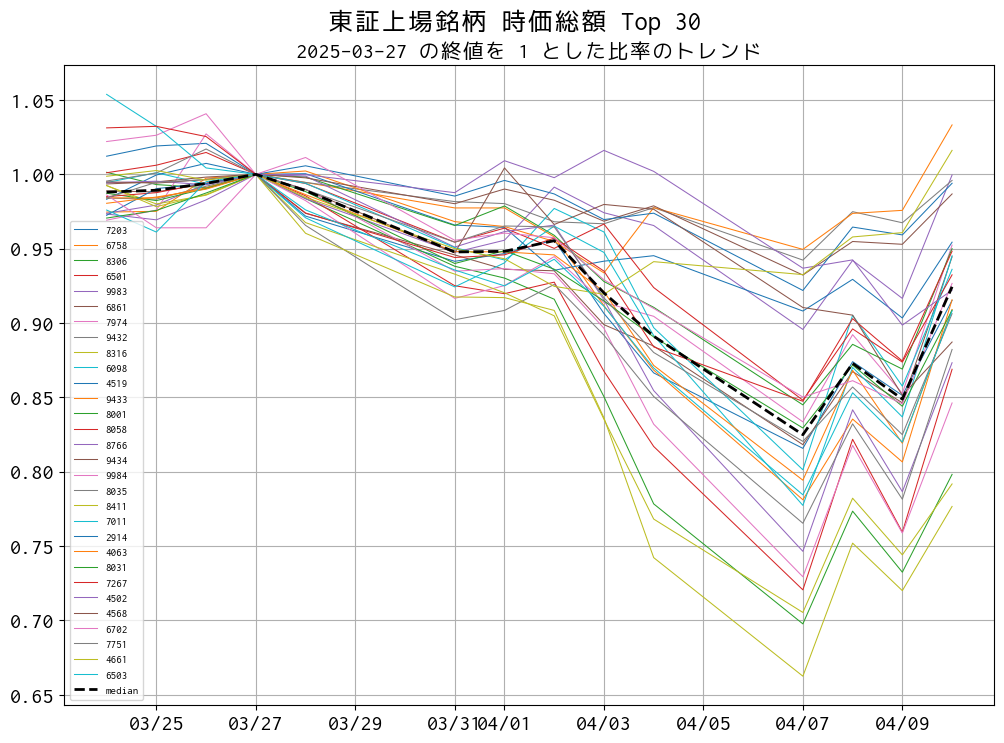

In [15]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    """
    match colname:
        case '4661':
            width = 1.5
            lstyle = 'solid'
        case '2914':
            width = 1.5
            lstyle = 'solid'
        case '9432':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case '9434':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.75
            lstyle = 'solid'
    """

    width = 0.75
    lstyle = 'solid'
    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [8]:
for code in ['9433', '9432', '4661', '2914', '9434']:
    get_code_into(code)
    print()

9433 KDDI Corporation
2025-04-08    0.973738
2025-04-09    0.975790
2025-04-10    1.033238
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-08    0.974898
2025-04-09    0.967436
2025-04-10    0.995930
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-08    0.957903
2025-04-09    0.960806
2025-04-10    1.016129
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-08    0.964551
2025-04-09    0.959281
2025-04-10    0.994012
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-08    0.954845
2025-04-09    0.952963
2025-04-10    0.986830
Name: Close, dtype: float64



In [9]:
summary

,7203,6758,8306,6501,9983,6861,7974,9432,8316,6098,...,2914,4063,8031,7267,4502,4568,6702,7751,4661,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.969175,0.984000,0.992380,0.994455,...,0.972455,0.980535,0.970608,1.031250,0.994306,0.994916,0.986138,0.984179,0.998713,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.975975,0.983333,0.980088,1.001085,...,0.990419,0.984738,0.975727,1.032280,0.995401,0.994113,0.964055,0.994658,1.002575,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.027199,0.992000,0.985988,0.993370,...,0.993772,0.990047,0.987450,1.025412,0.992992,0.996521,0.964055,0.996507,0.996138,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.983656,0.973799,0.982321,0.994573,0.967552,0.970787,...,1.005749,0.986347,0.988415,0.973980,0.999776,0.989749,1.011334,0.989727,0.984516,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.947527,0.945819,0.916591,0.981683,0.932891,0.924312,...,0.985389,0.948075,0.940060,0.944093,0.987690,0.947127,0.955635,0.954387,0.950000,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.955699,0.936115,0.925204,0.980326,0.920354,0.940488,...,0.995928,0.947851,0.948623,0.945851,1.009176,1.004316,0.960492,0.965276,0.943226,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.991398,0.935145,0.944696,0.968114,0.904867,0.977064,...,0.986826,0.945837,0.936199,0.957103,0.997762,0.966280,0.957416,0.964660,0.924677,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.974194,0.898916,0.913871,0.966757,0.835300,0.961251,...,0.969581,0.921218,0.914876,0.934951,1.016115,0.979768,0.929080,0.916992,0.919355,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.965591,0.884522,0.904533,0.977612,0.768191,0.896910,...,0.973892,0.871531,0.890698,0.883966,1.002014,0.976531,0.909812,0.880214,0.941290,0.869797


In [10]:
summary.tail(1).iloc[0]

7203    0.915242
6758    0.915628
8306    0.798227
6501    0.868914
9983    0.999570
6861    0.944525
7974    0.952403
9432    0.995930
8316    0.791790
6098    0.936142
4519    0.954397
9433    1.033238
8001    0.950049
8058    0.932413
8766    0.873321
9434    0.986830
9984    0.846250
8035    0.882234
8411    0.776670
7011    0.945239
2914    0.994012
4063    0.909132
8031    0.908664
7267    0.948312
4502    0.922113
4568    0.887240
6702    0.926652
7751    0.906308
4661    1.016129
6503    0.908153
Name: 2025-04-10 00:00:00, dtype: float64

In [11]:
summary.median(axis=1)

2025-03-24    0.988073
2025-03-25    0.989306
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989071
2025-03-31    0.947801
2025-04-01    0.948237
2025-04-02    0.955387
2025-04-03    0.920286
2025-04-04    0.891153
2025-04-07    0.824919
2025-04-08    0.872879
2025-04-09    0.848856
2025-04-10    0.924382
dtype: float64